### 1. Import the necessary libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import zscore

### 2. Load the dataset

In [3]:
# file_path = "../data/benin_malanville.csv"  # Replace with the actual extension
df = pd.read_csv("../data/togo-dapaong_qc.csv", encoding='latin-1', on_bad_lines='warn')
# Display the first 5 rows
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



### 3. Summary Statistics & Missing-Value Report

In [4]:
# Summary stats
summary_stats = df.describe()
summary_stats



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [5]:
# Missing values
missing_values = df.isna().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
# number of columns and rows
df.shape

(525600, 19)

In [7]:
missing_report = missing_values[missing_values > 0]
missing_percent = (missing_values / len(df)) * 100
high_null_cols = missing_percent[missing_percent > 5]

print("Missing Value Report:\n", missing_report)
print("Columns with >5% missing values:\n", high_null_cols)

Missing Value Report:
 Comments    525600
dtype: int64
Columns with >5% missing values:
 Comments    100.0
dtype: float64


* From the data we can observe comments column is 100% missing (i.e., all 525,601 rows are NaN). So, Droping this Comments column is Recommended

In [8]:
df.drop(columns=['Comments'], inplace=True)


#### Data Type Verification

In [9]:
print(df.dtypes)

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
dtype: object


### 4. Outlier Detection & Cleaning


In [10]:
# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

In [11]:
def find_outliers_iqr(column):
    """Return outliers in a column using the IQR method."""
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

# Columns to check
iqr_columns = ['ModA', 'ModB', 'WS', 'WSgust']

# Loop through each column and find outliers
for col in iqr_columns:
    outliers = find_outliers_iqr(df[col])
    print(f"\nOutliers in {col} ({len(outliers)} rows):")
    print(outliers)



Outliers in ModA (1237 rows):
674       1140.0
675       1133.0
681       1063.0
707       1068.0
708       1068.0
           ...  
522079    1070.1
522080    1070.1
522081    1107.0
522087    1086.5
522088    1069.1
Name: ModA, Length: 1237, dtype: float64

Outliers in ModB (1537 rows):
674       1126.0
675       1118.0
681       1049.0
682       1033.0
683       1028.0
           ...  
521950    1031.0
522022    1076.0
522023    1122.0
522081    1062.0
522087    1043.0
Name: ModB, Length: 1537, dtype: float64

Outliers in WS (8708 rows):
5410      6.6
5411      6.9
5413      7.1
5414      6.1
5420      6.1
         ... 
509569    8.2
509570    6.3
523566    6.1
523568    6.2
523629    6.1
Name: WS, Length: 8708, dtype: float64

Outliers in WSgust (7377 rows):
5410      9.7
5411      8.9
5413      8.9
5414      8.4
5420      8.9
         ... 
509585    8.9
523567    8.2
523568    8.2
523589    8.4
523628    8.2
Name: WSgust, Length: 7377, dtype: float64


In [12]:
# negative values in columns that should be actually positive
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print("Rows with negative values:")
print(negative_values)

Rows with negative values:
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599 2022-10-25 00:00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  \
0   

In [13]:
# Check missing values before cleaning
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WD', 'BP']
print("Missing value report BEFORE cleaning:")
print(df[key_columns].isna().sum())

Missing value report BEFORE cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
Tamb      0
RH        0
WS        0
WSgust    0
WD        0
BP        0
dtype: int64


In [14]:
# Compute Z-scores
z_scores = df[key_columns].apply(zscore, nan_policy='omit')

# Detect outliers: any row with |Z| > 3
outliers = (np.abs(z_scores) > 3).any(axis=1)
print(f"\nNumber of outlier rows detected: {outliers.sum()}")


Number of outlier rows detected: 10227


In [15]:
# Handle missing values (impute with median) 
df[key_columns] = df[key_columns].fillna(df[key_columns].median())

In [16]:
# Final check for missing values
print("\nMissing value report AFTER cleaning:")
print(df[key_columns].isna().sum())


Missing value report AFTER cleaning:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
Tamb      0
RH        0
WS        0
WSgust    0
WD        0
BP        0
dtype: int64


##### Export cleaned DataFrame to data/<country>_clean.csv

In [17]:
import os
country = 'togo'
output_path = os.path.join('..', 'data', f"{country}_clean.csv")

# Assign cleaned DataFrame
df_cleaned = df

# Export cleaned DataFrame
df_cleaned.to_csv(output_path, index=False)

# Print confirmation message
print(f"\nCleaned data exported to: {output_path}")


Cleaned data exported to: ..\data\togo_clean.csv


In [18]:
# country = 'togo'  
# output_path = f'data/{country}_clean.csv'  
# df_cleaned = df
# Export cleaned data
# df_cleaned.to_csv(output_path, index=False)
# print(f"\n✅ Cleaned data exported to: {output_path}")

### 5. Time Series Analysis

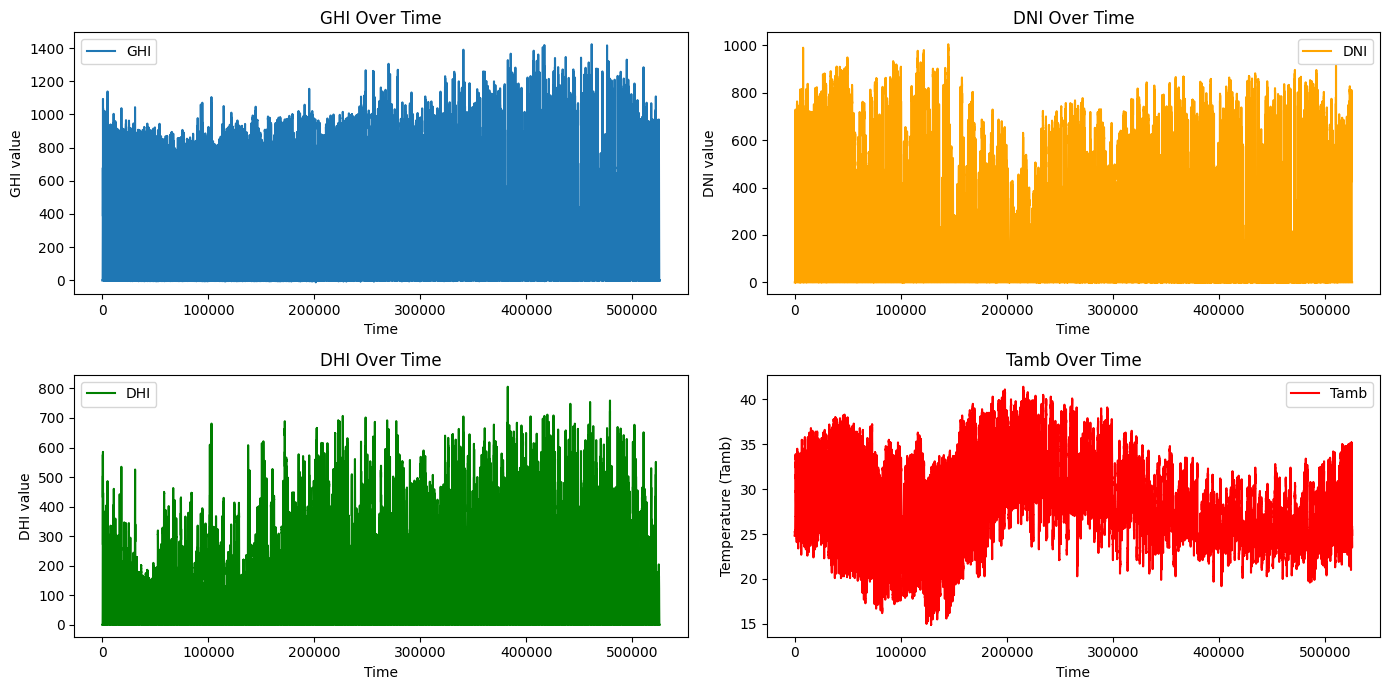

In [19]:
plt.figure(figsize=(14, 7))

# Plot GHI over time
plt.subplot(2, 2, 1)
plt.plot(df_cleaned.index, df_cleaned['GHI'], label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI value')
plt.legend()

# Plot DNI over time
plt.subplot(2, 2, 2)
plt.plot(df_cleaned.index, df_cleaned['DNI'], label='DNI', color='orange')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI value')
plt.legend()

# Plot DHI over time
plt.subplot(2, 2, 3)
plt.plot(df_cleaned.index, df_cleaned['DHI'], label='DHI', color='green')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI value')
plt.legend()

# Plot Tamb over time
plt.subplot(2, 2, 4)
plt.plot(df_cleaned.index, df_cleaned['Tamb'], label='Tamb', color='red')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (Tamb)')
plt.legend()

plt.tight_layout()
plt.show()

### 6. Cleaning Impact Analysis

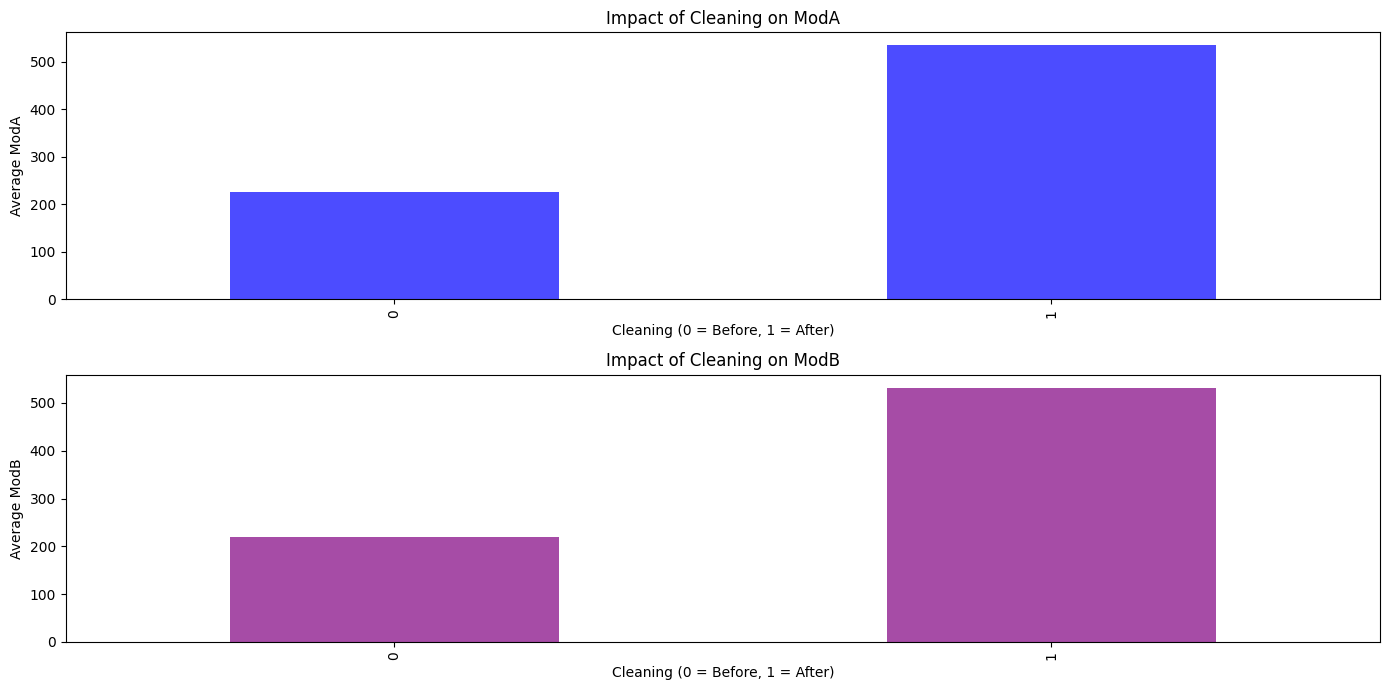

In [20]:
# Set the overall figure size
plt.figure(figsize=(14, 7))

# Assumes 'Cleaning' column contains 0 (before) and 1 (after)
moda_avg_by_cleaning = df_cleaned.groupby('Cleaning')['ModA'].mean()

# Create the first subplot (1st row)
plt.subplot(2, 1, 1)
moda_avg_by_cleaning.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Impact of Cleaning on ModA')        # Title for the plot
plt.xlabel('Cleaning (0 = Before, 1 = After)')  # X-axis label
plt.ylabel('Average ModA')                     # Y-axis label


# Group data by the 'Cleaning' flag and calculate the average of 'ModB'
modb_avg_by_cleaning = df_cleaned.groupby('Cleaning')['ModB'].mean()

# Create the second subplot (2nd row)
plt.subplot(2, 1, 2)
modb_avg_by_cleaning.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Impact of Cleaning on ModB')        # Title for the plot
plt.xlabel('Cleaning (0 = Before, 1 = After)')  # X-axis label
plt.ylabel('Average ModB')                     # Y-axis label

# Automatically adjust subplot spacing to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()


### 7. Correlation & Relationship Analysis

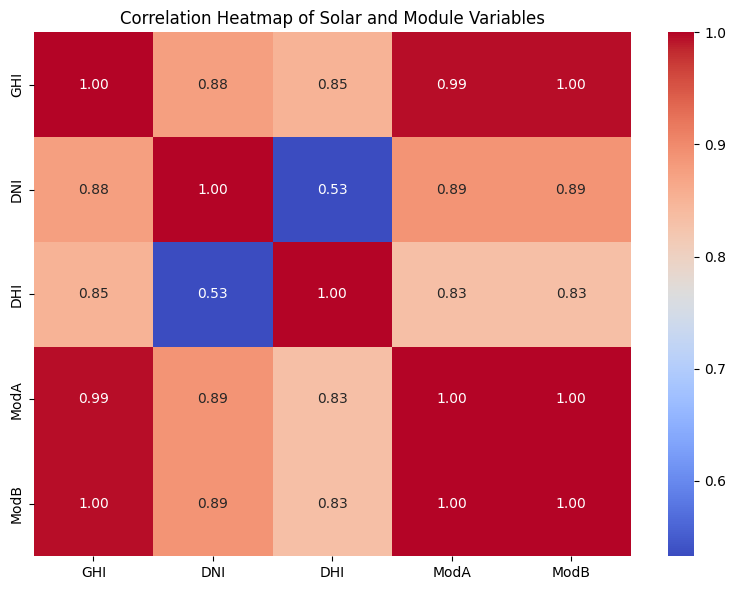

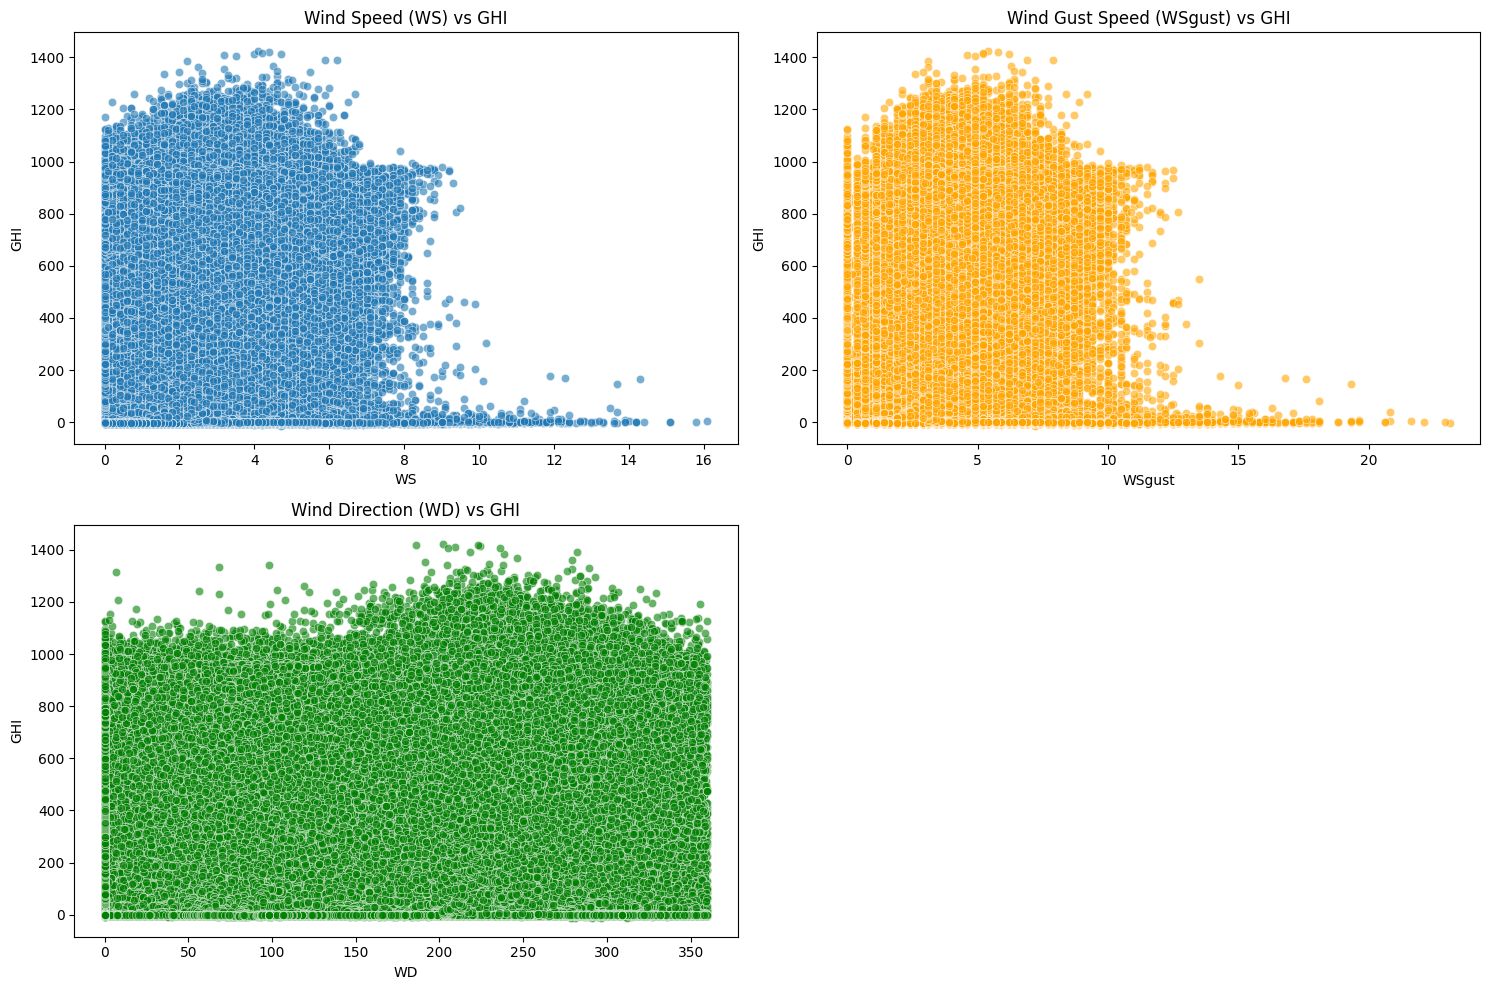

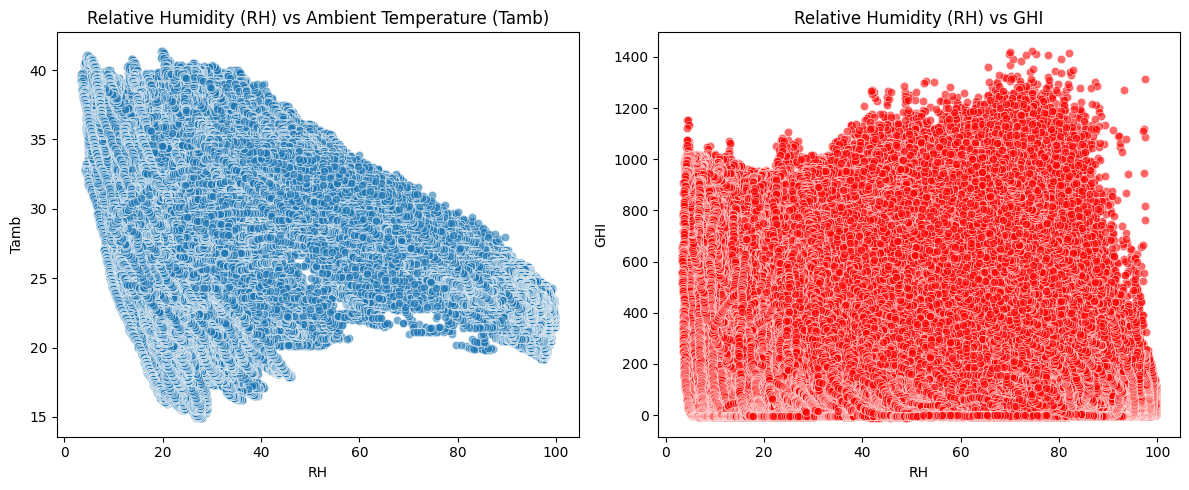

In [21]:

# 1. Heatmap of Correlations

corr_vars = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']  # Adjust names if needed
corr_matrix = df_cleaned[corr_vars].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Solar and Module Variables')
plt.tight_layout()
plt.show()

# 2. Scatter Plots: WS, WSgust, WD vs GHI
plt.figure(figsize=(15, 10))

# WS vs GHI
plt.subplot(2, 2, 1)
sns.scatterplot(x='WS', y='GHI', data=df_cleaned, alpha=0.6)
plt.title('Wind Speed (WS) vs GHI')

# WSgust vs GHI
plt.subplot(2, 2, 2)
sns.scatterplot(x='WSgust', y='GHI', data=df_cleaned, alpha=0.6, color='orange')
plt.title('Wind Gust Speed (WSgust) vs GHI')

# WD vs GHI
plt.subplot(2, 2, 3)
sns.scatterplot(x='WD', y='GHI', data=df_cleaned, alpha=0.6, color='green')
plt.title('Wind Direction (WD) vs GHI')

plt.tight_layout()
plt.show()

# 3. Scatter Plots: RH vs Tamb and RH vs GHI
plt.figure(figsize=(12, 5))

# RH vs Tamb
plt.subplot(1, 2, 1)
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned, alpha=0.6)
plt.title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')

# RH vs GHI
plt.subplot(1, 2, 2)
sns.scatterplot(x='RH', y='GHI', data=df_cleaned, alpha=0.6, color='red')
plt.title('Relative Humidity (RH) vs GHI')

plt.tight_layout()
plt.show()


### 8. Wind & Distribution Analysis

### Wind Rose Plot (Radial Bar Plot)

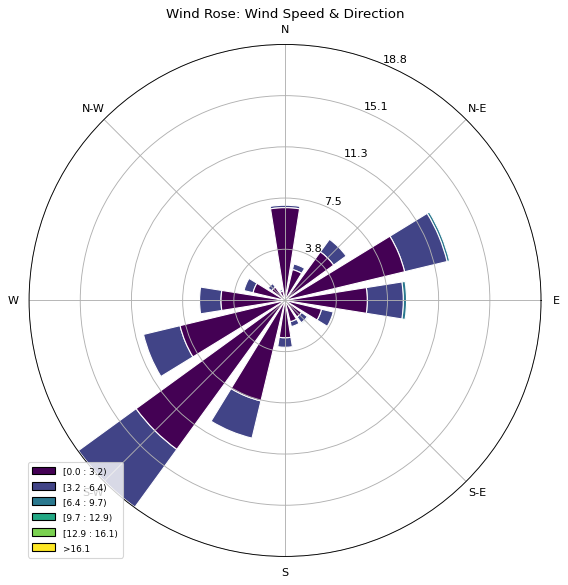

In [22]:
from windrose import WindroseAxes

# Cleaned data: drop NaNs
wind_data = df_cleaned[['WS', 'WD']].dropna()

# Create wind rose
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose: Wind Speed & Direction')
plt.show()


### Histograms for GHI and WS

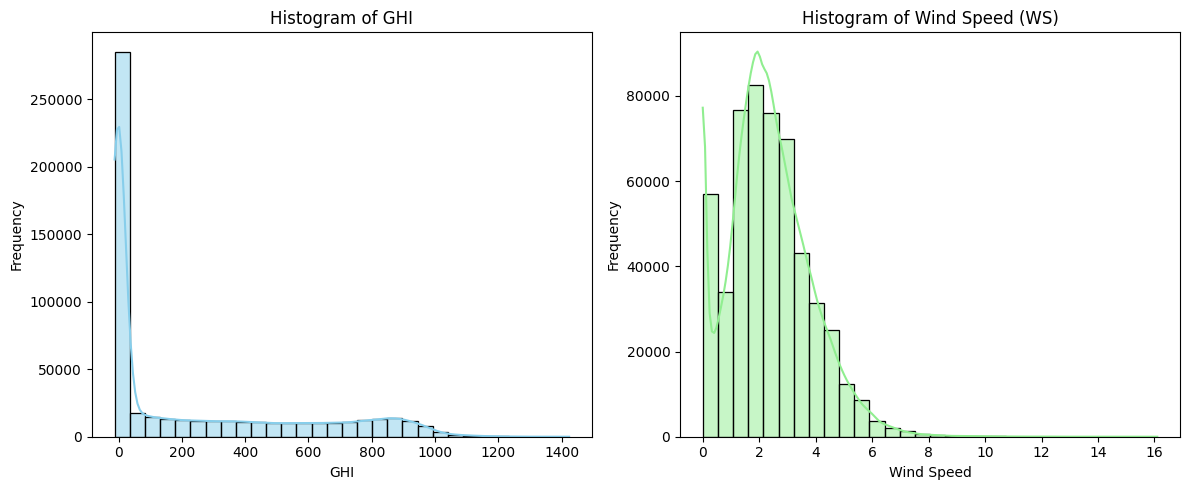

In [23]:
plt.figure(figsize=(12, 5))

# Histogram for GHI
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['GHI'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['WS'], bins=30, kde=True, color='lightgreen')
plt.title('Histogram of Wind Speed (WS)')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 9. Temperature Analysis

In [24]:
# Compute correlation values
corr_rh_tamb = df_cleaned['RH'].corr(df_cleaned['Tamb'])
corr_rh_ghi = df_cleaned['RH'].corr(df_cleaned['GHI'])

print(f"🔹 Correlation between RH and Tamb: {corr_rh_tamb:.2f}")
print(f"🔹 Correlation between RH and GHI: {corr_rh_ghi:.2f}")


🔹 Correlation between RH and Tamb: -0.40
🔹 Correlation between RH and GHI: -0.26


* A negative correlation with Tamb implies higher RH is associated with lower temperatures.

* A negative correlation with GHI suggests more humid conditions reduce solar radiation (possibly due to cloud cover).

### 10. Bubble Chart

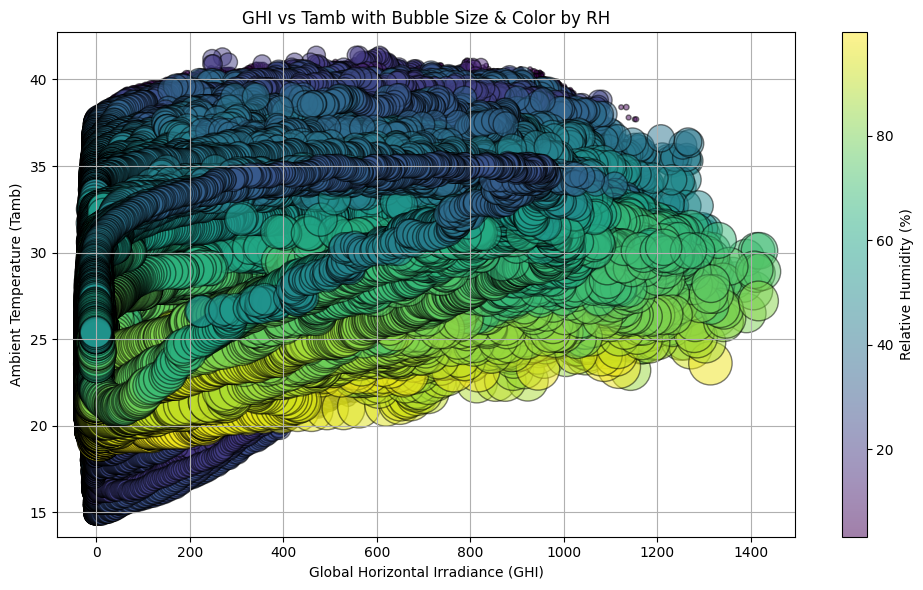

In [25]:
# Extract relevant columns directly (no missing values assumed)
bubble_data = df_cleaned[['GHI', 'Tamb', 'RH']]

# Normalize RH to scale bubble sizes between 0 and 1000
bubble_sizes = (bubble_data['RH'] - bubble_data['RH'].min()) / (bubble_data['RH'].max() - bubble_data['RH'].min()) * 1000

# Plot the bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    bubble_data['GHI'],        # X-axis: Global Horizontal Irradiance
    bubble_data['Tamb'],       # Y-axis: Ambient Temperature
    s=bubble_sizes,            # Bubble size: scaled Relative Humidity
    c=bubble_data['RH'],       # Bubble color: RH values
    cmap='viridis',            # Color map for RH
    alpha=0.5,                 # Transparency for better overlap visibility
    edgecolors='k'             # Black border for visual clarity
)

# Add colorbar
plt.colorbar(scatter, label='Relative Humidity (%)')

# Add labels and title
plt.title('GHI vs Tamb with Bubble Size & Color by RH')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.grid(True)
plt.tight_layout()
plt.show()

